In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

### I am using Bank Marketing Data set from Portuguese Banking institution https://archive.ics.uci.edu/ml/datasets/bank+marketing

### I have removed the marketing related columns from the dataset and will add a new column for Income. We will keep the data consistent with Portuguese system with the hypothesis that this will translate to US with the real data. All currencies are in Euros.

In [3]:
df_orig = pd.read_csv('clustering.csv')
df_orig.head()

,age,job,marital,education,balance,housing
0,58,management,married,tertiary,2143,yes
1,44,technician,single,secondary,29,yes
2,33,entrepreneur,married,secondary,2,yes
3,47,blue-collar,married,NaN,1506,yes
4,35,management,married,tertiary,231,yes


In [4]:
df = df_orig.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44110 entries, 0 to 44109
Data columns (total 6 columns):
age          44110 non-null int64
job          44110 non-null object
marital      44110 non-null object
education    42411 non-null object
balance      44110 non-null int64
housing      44110 non-null object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


### Education column has some missing values

In [5]:
df['education'].value_counts()

secondary    22674
tertiary     13064
primary       6673
Name: education, dtype: int64

### Check if there is a relationship between eduation and job (there has to be)

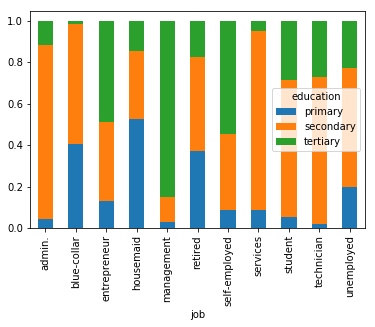

In [6]:
edu_counts = pd.crosstab(df.job, df.education)
edu_pcts = edu_counts.div(edu_counts.sum(1).astype(float), axis=0)
edu_pcts.plot(kind='bar', stacked=True)

### Fill missing education based on most frequent by job

In [7]:
mode = lambda x: x.mode()[0]
freq_edu = df.groupby('job')['education'].agg(mode).to_dict()
df['education'] = df.education.fillna(df.job.map(freq_edu))

### Create buckets for Age

In [8]:
def modif(row):
    if row['age'] <= 18:
        return 1
    elif (row['age'] > 18) & (row['age'] <= 25):
        return 2 
    elif (row['age'] > 25) & (row['age'] <= 35):
        return 3 
    elif (row['age'] > 35) & (row['age'] <= 45):
        return 4 
    elif (row['age'] > 45) & (row['age'] <= 55):
        return 5 
    elif (row['age'] > 55) & (row['age'] <= 65):
        return 6     
    elif (row['age'] > 65) & (row['age'] <= 75):
        return 7   
    else:
        return 8
    
df['age'] = df.apply(modif, axis = 1)

In [9]:
df['age'].value_counts()

3    15218
4    13527
5     9273
6     4038
2     1303
7      482
8      257
1       12
Name: age, dtype: int64

### Create a new column for Income and populate based on job and education. I took help from http://www.averagesalarysurvey.com/portugal. As stated earlier, we are using portuguese system so all values are in Euros

In [10]:
def income(row):
    if row['job'] == 'management' and row['education'] == 'primary':
        return np.random.randint(40000,45000)
    elif row['job'] == 'management' and row['education'] == 'secondary':
        return np.random.randint(45000,55000)
    elif row['job'] == 'management' and row['education'] == 'tertiary':
        return np.random.randint(55000,65000)
    elif row['job'] == 'services' and row['education'] == 'primary':
        return np.random.randint(12000,15000)
    elif row['job'] == 'services' and row['education'] == 'secondary':
        return np.random.randint(15000,18000)
    elif row['job'] == 'services' and row['education'] == 'tertiary':
        return np.random.randint(18000,20000)
    elif row['job'] == 'admin.' and row['education'] == 'primary':
        return np.random.randint(15000,18000)
    elif row['job'] == 'admin.' and row['education'] == 'secondary':
        return np.random.randint(18000,22000)
    elif row['job'] == 'admin.' and row['education'] == 'tertiary':
        return np.random.randint(22000,25000)
    elif row['job'] == 'technician' and row['education'] == 'primary':
        return np.random.randint(25000,28000)
    elif row['job'] == 'technician' and row['education'] == 'secondary':
        return np.random.randint(28000,32000)
    elif row['job'] == 'technician' and row['education'] == 'tertiary':
        return np.random.randint(32000,35000)
    elif row['job'] == 'blue-collar' and row['education'] == 'primary':
        return np.random.randint(12000,15000)
    elif row['job'] == 'blue-collar' and row['education'] == 'secondary':
        return np.random.randint(15000,17000)
    elif row['job'] == 'blue-collar' and row['education'] == 'tertiary':
        return np.random.randint(17000,18000)
    elif row['job'] == 'housemaid' and row['education'] == 'primary':
        return np.random.randint(6000,8000)
    elif row['job'] == 'housemaid' and row['education'] == 'secondary':
        return np.random.randint(8000,10000)
    elif row['job'] == 'housemaid' and row['education'] == 'tertiary':
        return np.random.randint(10000,12000)
    elif row['job'] == 'entrepreneur' and row['education'] == 'primary':
        return np.random.randint(25000,35000)
    elif row['job'] == 'entrepreneur' and row['education'] == 'secondary':
        return np.random.randint(35000,45000)
    elif row['job'] == 'entrepreneur' and row['education'] == 'tertiary':
        return np.random.randint(45000,55000)    
    elif row['job'] == 'self-employed' and row['education'] == 'primary':
        return np.random.randint(18000,22000)
    elif row['job'] == 'self-employed' and row['education'] == 'secondary':
        return np.random.randint(22000,26000)
    elif row['job'] == 'self-employed' and row['education'] == 'tertiary':
        return np.random.randint(26000,30000)
    elif row['job'] == 'student' and row['education'] == 'primary':
        return np.random.randint(10000,12500)
    elif row['job'] == 'student' and row['education'] == 'secondary':
        return np.random.randint(12500,15000)
    elif row['job'] == 'student' and row['education'] == 'tertiary':
        return np.random.randint(15000,20000)
    elif row['job'] == 'retired' and row['education'] == 'primary':
        return np.random.randint(5000,7500)
    elif row['job'] == 'retired' and row['education'] == 'secondary':
        return np.random.randint(7500,10000)
    elif row['job'] == 'retired' and row['education'] == 'tertiary':
        return np.random.randint(10000,15000)    
    elif row['job'] == 'unemployed':
        return 0
    
df['income'] = df.apply(income,axis = 1)

### Convert categories to numeric

In [11]:
edu_map = {'primary': 1, 'secondary': 2, 'tertiary': 3}
df['education'] = df['education'].map(edu_map)

job_map = {'unemployed': 0, 'student': 1, 'retired': 2,'housemaid':3,'blue-collar':4, 'admin.':5, \
           'technician':6,'services':7,'self-employed':8,'management':9,'entrepreneur':10}
df['job'] = df['job'].map(job_map)

marital_map = {'single': 1, 'married': 2, 'divorced': 3}
df['marital'] = df['marital'].map(marital_map)

housing_map = {'no': 0, 'yes': 1}
df['housing'] = df['housing'].map(housing_map)

In [12]:
df.head()

,age,job,marital,education,balance,housing,income
0,6,9,2,3,2143,1,61053
1,4,6,1,2,29,1,28126
2,3,10,2,2,2,1,43127
3,5,4,2,2,1506,1,16464
4,3,9,2,3,231,1,56858


### We have prepared the data. Get optimal number of clusters using elbow method

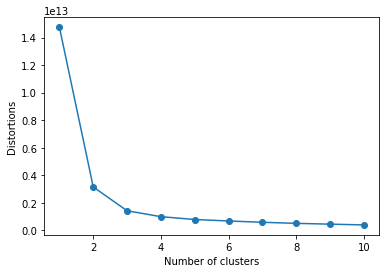

In [13]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,
               init = 'k-means++',
               n_init=10,
               max_iter = 300,
               random_state=10)
    km.fit_predict(df)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

### Curve changes at 3 so it is the optimal number of clusters. Run k-means algorithm with 3 clusters

In [16]:
km_3 = KMeans(n_clusters=3,
            init = 'k-means++',
            n_init=10,
            max_iter = 300,
            tol=1e-04,
            random_state=10)
y_km_3 = km_3.fit_predict(df)
y_km_3

array([1, 2, 2, ..., 0, 0, 2], dtype=int32)

### combine original data clumns, newly created income column and cluster numbers for analysis

In [23]:
clustered_3 = pd.DataFrame(np.c_[df_orig,df.income,y_km])
clustered_3.head(25)

,0,1,2,3,4,5,6,7
0,58,management,married,tertiary,2143,yes,61053,1
1,44,technician,single,secondary,29,yes,28126,2
2,33,entrepreneur,married,secondary,2,yes,43127,2
3,47,blue-collar,married,NaN,1506,yes,16464,0
4,35,management,married,tertiary,231,yes,56858,1
5,28,management,single,tertiary,447,yes,57566,1
6,58,retired,married,primary,121,yes,5867,0
7,43,technician,single,secondary,593,yes,31389,2
8,41,admin.,divorced,secondary,270,yes,18484,0
9,29,admin.,single,secondary,390,yes,20635,0


### Clusters:
### 0 - lower to mid level...admin, blue collar workers, retirees;
### 1 - upper level...management, upper level entrepreneurs;
### 2 - mid-level...technicians, self employed, entrepreneurs;

### Let us try with 4 clusters

In [24]:
km_4 = KMeans(n_clusters=4,
            init = 'k-means++',
            n_init=10,
            max_iter = 300,
            tol=1e-04,
            random_state=10)
y_km_4 = km_4.fit_predict(df)

clustered_4 = pd.DataFrame(np.c_[df_orig,df.income,y_km_4])
clustered_4.head(25)

,0,1,2,3,4,5,6,7
0,58,management,married,tertiary,2143,yes,61053,1
1,44,technician,single,secondary,29,yes,28126,2
2,33,entrepreneur,married,secondary,2,yes,43127,2
3,47,blue-collar,married,NaN,1506,yes,16464,0
4,35,management,married,tertiary,231,yes,56858,1
5,28,management,single,tertiary,447,yes,57566,1
6,58,retired,married,primary,121,yes,5867,3
7,43,technician,single,secondary,593,yes,31389,2
8,41,admin.,divorced,secondary,270,yes,18484,0
9,29,admin.,single,secondary,390,yes,20635,0


### clusters:
### 0 - lower level... admin, blue collar, services, students; 
### 1 - upper level... managment and upper level entrepreneurs;
### 2 - mid level... technicians, self employed or entrepreneurs;
### 3 - retirees, unemployed, housemaids


In [36]:
clustered_4[clustered_4[7]==0].head(50)

,0,1,2,3,4,5,6,7
3,47,blue-collar,married,NaN,1506,yes,16464,0
8,41,admin.,divorced,secondary,270,yes,18484,0
9,29,admin.,single,secondary,390,yes,20635,0
12,57,services,married,secondary,162,yes,17148,0
14,45,admin.,single,NaN,13,yes,20644,0
15,57,blue-collar,married,primary,52,yes,14552,0
17,33,services,married,secondary,0,yes,17156,0
18,28,blue-collar,married,secondary,723,yes,16518,0
20,32,blue-collar,single,primary,23,yes,14239,0
21,25,services,married,secondary,50,yes,16677,0
